In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price-prediction/Real estate.csv


## Flow

 **1 .Data Exploration**
> 1. *Null Values*
> 2. *Duplicates*
> 3. *Renaming Columns*

**2. Feature Engineering**

**3. Normality Test**

**4. Outlier Test**

**5. Model Processing**
>  1. Simple Linear Regression
>  2. Average Model(Simple Stack Regression)
>  3. Polynomial Regression
>  4. Advanced Stack Regression

**Credits for Stack Regression : https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard**

# Data Exploration

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
from scipy.special import boxcox1p
# from scipy.stats import 

In [40]:
orig = pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")
data = pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")

In [41]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [42]:
data.shape

(414, 8)

In [43]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [46]:
for cols in data.columns:
    sum = data[cols].duplicated().sum()
    if sum > 0:
        print(f"Column {cols} has duplicates count {sum}")  

Column X1 transaction date has duplicates count 402
Column X2 house age has duplicates count 178
Column X3 distance to the nearest MRT station has duplicates count 155
Column X4 number of convenience stores has duplicates count 403
Column X5 latitude has duplicates count 180
Column X6 longitude has duplicates count 182
Column Y house price of unit area has duplicates count 144


In [47]:
# Renaming Columns
data.rename(columns = {
    "No": "Id",
    "X1 transaction date": "transaction_date",
    "X2 house age": "house_age",
    "X3 distance to the nearest MRT station": "dist_to_nearest_MRT_station",
    "X4 number of convenience stores": "cnt_of_convenience_store",
    "X5 latitude": "latitude",
    "X6 longitude": "longitude",
    "Y house price of unit area": "price_per_unit_area"
}, inplace=True)

# Feature Engineering and Normality Check

In [48]:
# separating year from dates
data["year"] =data["transaction_date"].astype(int)
data.drop(columns = ["transaction_date"],inplace = True)
data.head()

,Id,house_age,dist_to_nearest_MRT_station,cnt_of_convenience_store,latitude,longitude,price_per_unit_area,year
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [49]:
corr = data.corr()
sorted_corr = corr["price_per_unit_area"].sort_values(ascending=False)
print(sorted_corr)

price_per_unit_area            1.000000
cnt_of_convenience_store       0.571005
latitude                       0.546307
longitude                      0.523287
year                           0.081545
Id                            -0.028587
house_age                     -0.210567
dist_to_nearest_MRT_station   -0.673613
Name: price_per_unit_area, dtype: float64


**Lets Check For Distribution Of Target Variable**

In [50]:
skewness = skew(data["price_per_unit_area"])
print(skewness)

0.5976770142537495



 mu = 37.98 and sigma = 13.59



/tmp/ipykernel_557/3303439165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price_per_unit_area"],fit=norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


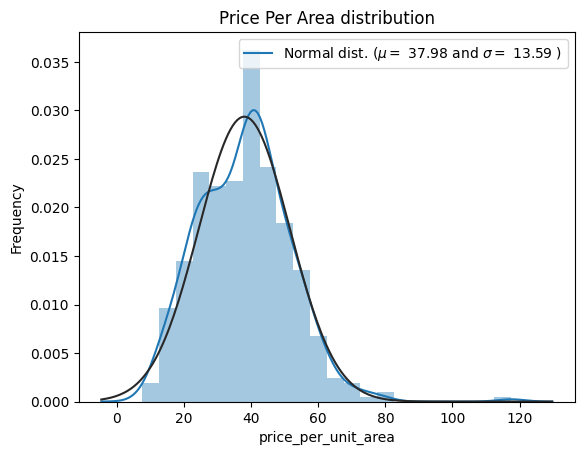

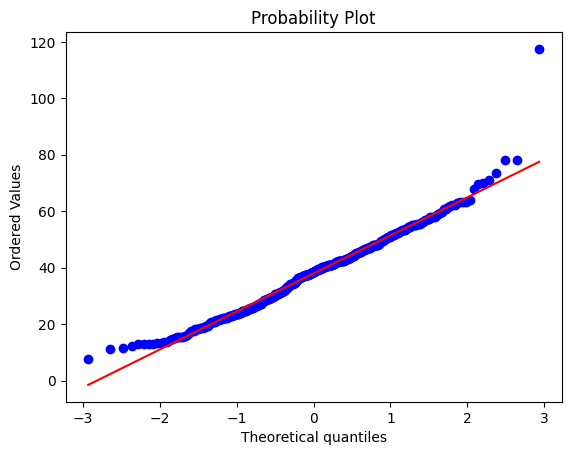

In [51]:
sns.distplot(data["price_per_unit_area"],fit=norm)
(mu,sigma) = norm.fit(data["price_per_unit_area"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price Per Area distribution')

fig = plt.figure()
res = stats.probplot(data["price_per_unit_area"],plot = plt)
plt.show()

**Applying Log Transformation as the column is right skewed**

/tmp/ipykernel_557/3757499462.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price_per_unit_area"], fit = norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 3.60 and sigma = 0.38



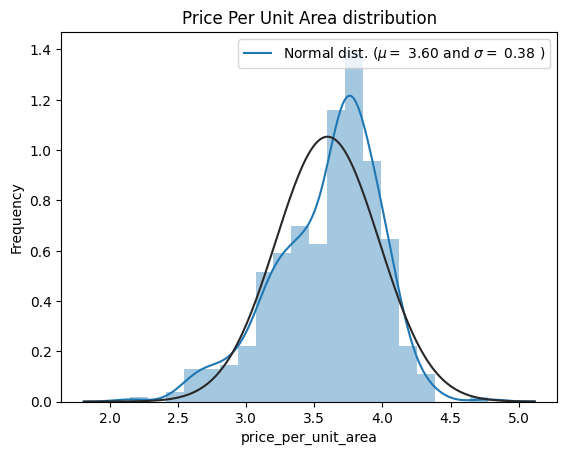

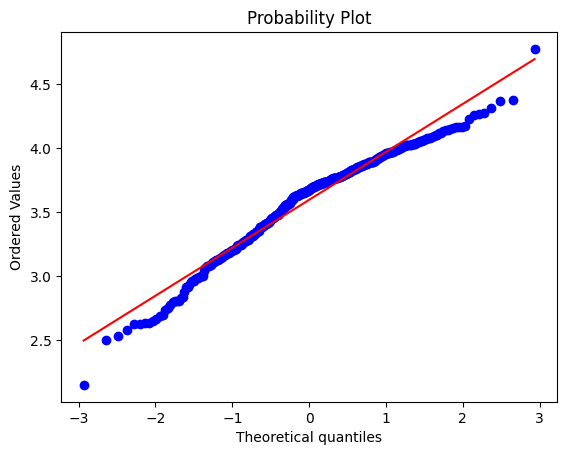

In [52]:
data["price_per_unit_area"] = np.log1p(data["price_per_unit_area"])

sns.distplot(data["price_per_unit_area"], fit = norm)
(mu,sigma) = norm.fit(data["price_per_unit_area"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price Per Unit Area distribution')


## qq plot
fig = plt.figure()
res = stats.probplot(data["price_per_unit_area"],plot = plt)
plt.show()


* **Hence We Have Distributed our Target in Normal Distribution Form**

In [53]:
skewness = skew(data["price_per_unit_area"])
print(skewness)

-0.6624246194168264


**Applying Box-cox technique**

The Box-Cox transformation can be expressed as follows:

$$
y(\lambda) =   
\begin{cases}   
\ {y^{\lambda} -1}/\lambda & \text{if } \lambda \neq  0 \\
\log(y) & \text{if } \lambda =  0
\end{cases}
$$

where:
- $y$ is the original variable,
- $\lambda$ is the transformation parameter.


**Tried Applying BoxCox but didn't get good results so continued with log-transformation!**

Text(0.5, 0, 'Price Per Unit Area')

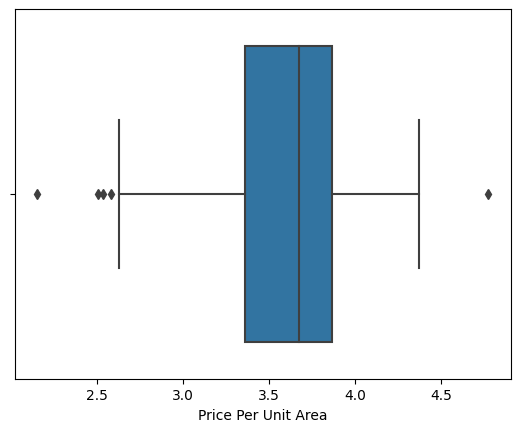

In [56]:
sns.boxplot(data=data,x="price_per_unit_area")
plt.xlabel("Price Per Unit Area")

# Model Processing

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           414 non-null    int64  
 1   house_age                    414 non-null    float64
 2   dist_to_nearest_MRT_station  414 non-null    float64
 3   cnt_of_convenience_store     414 non-null    int64  
 4   latitude                     414 non-null    float64
 5   longitude                    414 non-null    float64
 6   price_per_unit_area          414 non-null    float64
 7   year                         414 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


### **Simple Linear Regression**

In [60]:
# Importing Libraries
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [61]:
X = data.drop(columns="price_per_unit_area")
y = data["price_per_unit_area"]
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (414, 7)
Shape of y: (414,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [63]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (277, 7)
Shape of X_test: (137, 7)
Shape of y_train: (277,)
Shape of y_test: (137,)


**Without Scaling**

In [64]:
reg = LinearRegression()
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Initialize the Linear Regression model
    reg = LinearRegression()

    # Train the model on the training data
    model = reg.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, predictions)
    print("Mean Absolute Error: ", mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: ", mse)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = sqrt(mse)
    print("Root Mean Squared Error: ", rmse)

    # Calculate R-squared
    r2 = r2_score(y_test, predictions)
    print("R-squared: ", r2)

train_and_evaluate_model(X_train,y_train,X_test,y_test)

Mean Absolute Error:  0.13234977063005124
Mean Squared Error:  0.03126452484879013
Root Mean Squared Error:  0.17681777300031276
R-squared:  0.7406408756681281


**With Scaling**

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_and_evaluate_model(X_train_scaled,y_train,X_test_scaled,y_test)

Mean Absolute Error:  0.13234977063003395
Mean Squared Error:  0.03126452484878603
Root Mean Squared Error:  0.17681777300030116
R-squared:  0.7406408756681621


### **Averaging Models**


**Reference For In depth Stack Regression [Link](http://)**

* We use Robust Scaler to scale the data according to the interquartile ranges in simple words we stay safe from outliers

In [66]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1, tol=1e-7, max_iter=20000))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3, max_iter=10000, tol=1e-5))
KRR = KernelRidge(alpha=0.6,kernel="polynomial",degree=2,coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

> We use BaseEstimator that is a base class that provides a consistent interface for all estimators in the library (fit,predict,score,etc)

In [67]:
class AverageModels(BaseEstimator, RegressorMixin,TransformerMixin):
    
    def __init__(self,models):
        self.models = models
    
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
            
        return self
    
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions,axis=1)

In [68]:
averaged_models = AverageModels(models=(ENet, GBoost, KRR, lasso))
averaged_models.fit(X_train_scaled,y_train)
predictions = averaged_models.predict(X_test_scaled)  # Corrected line: Removed y_train
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test,predictions)
print("Means Squared Error: ",mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ",r2)

Means Squared Error:  0.023048278129199948
Root Mean Squared Error:  0.15181659372150313
R2 Score:  0.8087998694412251


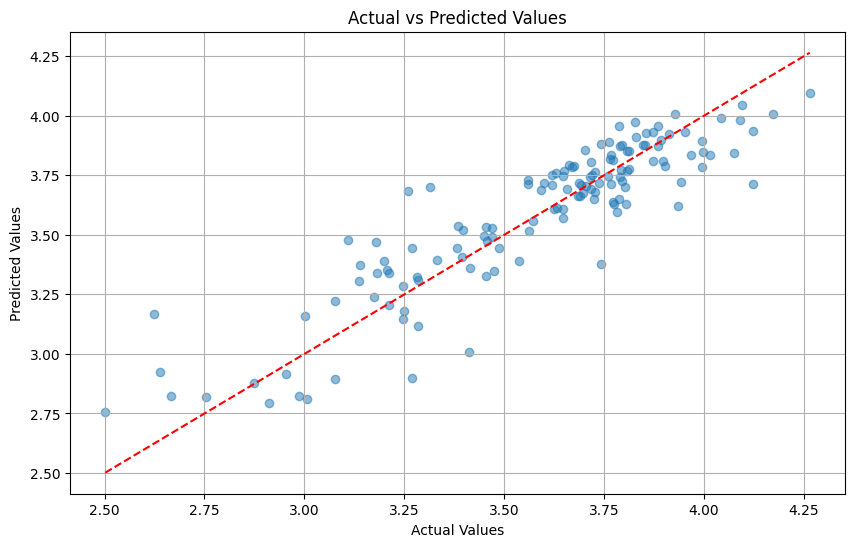

In [69]:
plt.figure(figsize=(10,  6))  # Optional: Set the figure size
plt.scatter(y_test, predictions, alpha=0.5)  # Alpha makes the points semi-transparent
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)  # Optional: Add grid lines
plt.show()


In [70]:
# Actual V/s Predicted Values
#Not so good model

**Trying Polynomial Regression**

In [71]:
polynomial_converter= PolynomialFeatures(degree=3, include_bias=False)
poly_features= polynomial_converter.fit_transform(X)
poly_features.shape

(414, 119)

In [72]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [73]:
scaler.fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [76]:
averaged_models = AverageModels(models=(ENet, GBoost, KRR, lasso))
averaged_models.fit(X_train_scaled,y_train_poly)
predictions = averaged_models.predict(X_test_scaled)  # Corrected line: Removed y_train
mse = mean_squared_error(y_test_poly, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test_poly,predictions)
print("Means Squared Error: ",mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ",r2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.456e-02, tolerance: 4.455e-04
  model = cd_fast.enet_coordinate_descent(


Means Squared Error:  0.02100777252562265
Root Mean Squared Error:  0.14494058274211075
R2 Score:  0.8225407384223404


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.075e-02, tolerance: 4.455e-06
  model = cd_fast.enet_coordinate_descent(


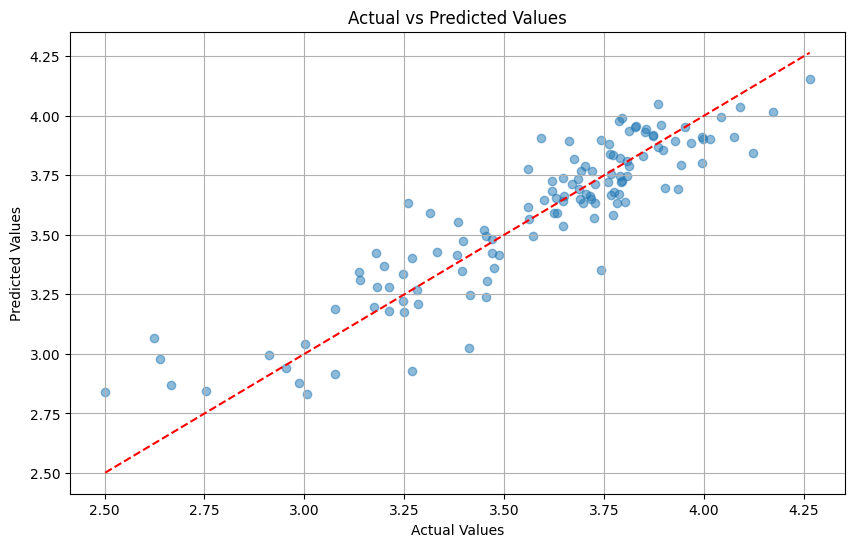

In [78]:
plt.figure(figsize=(10,  6))  # Optional: Set the figure size
plt.scatter(y_test_poly, predictions, alpha=0.5)  # Alpha makes the points semi-transparent
plt.plot([min(y_test_poly), max(y_test_poly)], [min(y_test_poly), max(y_test_poly)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)  # Optional: Add grid lines
plt.show()


**Still Better Try Changing Degree and Other Estimates**

**Advanced Stack Regression**

* Use K-Fold Here

In [120]:
class StackingAveragedModels(BaseEstimator,RegressorMixin,TransformerMixin):
    
    def __init__(self,base_models,meta_models,n_folds = 5):
        
        self.base_models = base_models
        self.meta_models = meta_models
        self.n_folds = n_folds
    
    
    def fit(self,X,y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_models)
        kfold = KFold(n_splits = self.n_folds,shuffle=True,random_state = 42)
    
        out_of_fold_predictions = np.zeros((X.shape[0],len(self.base_models)))
        
        for i,model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index,i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
    
    def predict(self,X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [123]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet,GBoost,KRR),meta_models=lasso)
stacked_averaged_models.fit(X_train,y_train)
stacked_pred = stacked_averaged_models.predict(X_train)
mse = mean_squared_error(y_train, stacked_pred)
rmse = sqrt(mse)
r2 = r2_score(y_train,stacked_pred)
print("Means Squared Error: ",mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ",r2)

Means Squared Error:  0.018308688999559335
Root Mean Squared Error:  0.1353096042399036
R2 Score:  0.8815864572205786


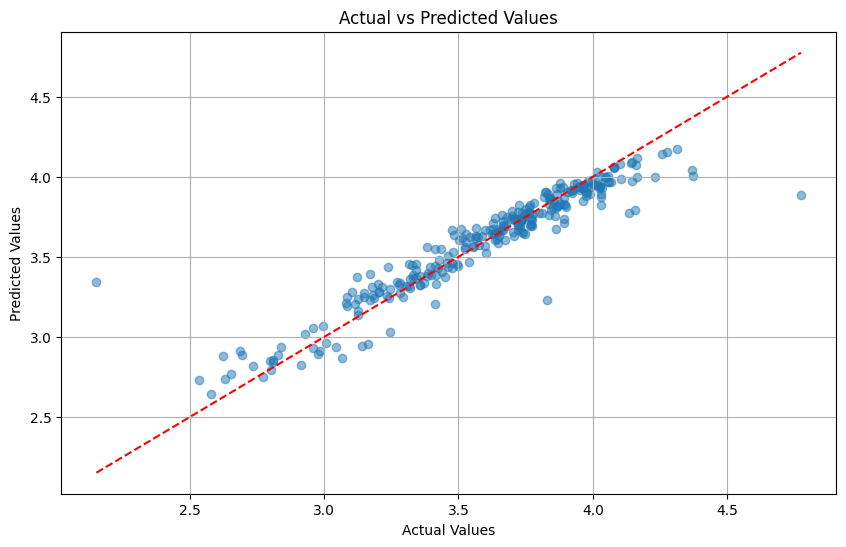

In [124]:
plt.figure(figsize=(10,  6))  # Optional: Set the figure size
plt.scatter(y_train, stacked_pred, alpha=0.5)  # Alpha makes the points semi-transparent
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)  # Optional: Add grid lines
plt.show()


**Thank-you**